In [4]:
import pandas as pd 

In [5]:
households = pd.read_csv('hhpub.csv')

households = households.sort_index(axis=1)
households.head(5)


,BIKE,BIKE2SAVE,BUS,CAR,CDIVMSAR,CENSUS_D,CENSUS_R,CNTTDHH,DRVRCNT,HBHTNRNT,...,TRAVDAY,URBAN,URBANSIZE,URBRUR,WALK,WALK2SAVE,WEBUSE17,WRKCOUNT,WTHHFIN,YOUNGCHILD
0,5,4,4,1,53,5,3,6,3,20,...,2,1,1,1,5,4,1,1,187.314320,0
1,4,4,5,1,32,3,2,2,2,5,...,5,4,6,2,4,4,1,2,69.513032,0
2,5,3,4,1,23,2,1,9,1,60,...,5,1,3,1,2,2,1,1,79.419586,0
3,5,3,5,1,53,5,3,4,2,50,...,5,1,1,1,2,2,1,0,279.143588,0
4,-9,5,-9,1,33,3,2,10,2,40,...,3,1,2,1,-9,5,1,0,103.240304,0


In [6]:
pd.set_option('max_columns', None)

In [7]:
NY_households = households[households['HHSTATE'] == 'NY']
NY_households

,BIKE,BIKE2SAVE,BUS,CAR,CDIVMSAR,CENSUS_D,CENSUS_R,CNTTDHH,DRVRCNT,HBHTNRNT,HBHUR,HBPPOPDN,HBRESDN,HHFAMINC,HHRELATD,HHRESP,HHSIZE,HHSTATE,HHSTFIPS,HHVEHCNT,HH_CBSA,HH_HISP,HH_RACE,HOMEOWN,HOUSEID,HTEEMPDN,HTHTNRNT,HTPPOPDN,HTRESDN,LIF_CYC,MSACAT,MSASIZE,NUMADLT,PARA,PC,PLACE,PRICE,PTRANS,RAIL,RESP_CNT,SAMPSTRAT,SCRESP,SMPLSRCE,SPHONE,TAB,TAXI,TDAYDATE,TRAIN,TRAVDAY,URBAN,URBANSIZE,URBRUR,WALK,WALK2SAVE,WEBUSE17,WRKCOUNT,WTHHFIN,YOUNGCHILD
2,5,3,4,1,23,2,1,9,1,60,C,17000,7000,10,2,1,1,NY,36,2,XXXXX,2,1,1,30000012,5000,80,17000,17000,1,3,3,1,5,1,1,2,5,2,1,3,1,2,1,3,5,201607,4,5,1,3,1,2,2,1,1,79.419586,0
8,5,5,5,1,23,2,1,12,2,30,T,750,300,8,1,1,4,NY,36,2,XXXXX,2,1,2,30000082,750,20,1500,300,4,3,3,2,5,1,3,3,5,2,4,3,1,2,1,5,5,201605,5,3,1,3,1,-9,5,1,2,1148.809332,2
15,-9,-9,1,-1,21,2,1,4,2,70,U,30000,17000,5,1,1,2,NY,36,1,35620,2,1,1,30000130,5000,60,30000,17000,2,1,5,2,-9,-9,1,1,1,1,2,1,1,1,1,-9,-9,201605,1,1,1,5,1,-9,1,1,2,3829.959655,0
39,-9,-9,4,1,23,2,1,18,2,50,S,3000,1500,3,1,1,3,NY,36,1,XXXXX,2,1,2,30000380,1500,50,3000,1500,6,3,1,2,-9,1,-9,1,-9,2,3,3,1,2,1,2,4,201610,-9,2,1,1,1,-9,-9,1,1,370.744472,0
44,2,3,5,1,23,2,1,6,2,30,R,750,300,8,1,1,2,NY,36,2,XXXXX,2,1,1,30000434,750,30,1500,750,2,3,2,2,5,1,2,-9,3,2,2,3,1,2,1,3,5,201605,4,7,4,6,2,1,2,1,2,101.472420,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129645,-9,4,-9,1,23,2,1,5,2,30,T,1500,750,5,1,1,2,NY,36,1,XXXXX,2,1,1,40793685,750,40,1500,750,10,3,2,2,-9,2,4,4,4,2,2,3,1,2,1,1,-9,201703,-9,1,1,1,1,-9,4,1,0,84.081993,0
129651,4,3,4,1,23,2,1,16,2,50,C,3000,3000,7,1,2,3,NY,36,3,XXXXX,2,1,1,40793808,3000,50,7000,3000,8,3,1,2,5,1,3,3,3,2,3,3,1,2,1,3,5,201612,5,7,1,1,1,1,3,1,2,141.856476,0
129662,5,3,5,1,23,2,1,7,1,20,R,300,50,3,2,1,1,NY,36,1,XXXXX,2,1,2,40793974,150,20,300,300,9,3,1,1,5,1,2,1,3,2,1,3,1,2,5,5,5,201701,5,3,1,1,1,2,3,1,0,15.543410,0
129668,5,5,4,1,24,2,1,11,2,5,R,50,50,8,1,1,2,NY,36,4,XXXXX,2,1,1,40794020,25,5,50,50,10,4,6,2,5,1,2,2,5,2,2,4,1,2,5,5,5,201702,5,3,4,6,2,4,5,1,0,72.789109,0


In [15]:
# dropping of columns - macro indicators
cleaned_NY = NY_households.drop(columns=['CAR','CENSUS_D', 'CENSUS_R', 'HBHTNRNT','HHSTATE', 'HHSTFIPS','HTEEMPDN','HTHTNRNT','HBPPOPDN','HBRESDN','HHRESP','HH_RACE','MSACAT','MSASIZE','NUMADLT','PARA','PC','SAMPSTRAT','SCRESP','SMPLSRCE','SPHONE','TAB','TDAYDATE','TRAVDAY','URBANSIZE','URBRUR','WTHHFIN','HH_HISP','HTPPOPDN','HTRESDN','HBHUR','HH_CBSA','YOUNGCHILD'])

cleaned_NY['VEH_OWNER'] = cleaned_NY['HHVEHCNT'].apply(lambda x: 1 if x > 0 else 0)

cleaned_NY

,BIKE,BIKE2SAVE,BUS,CDIVMSAR,CNTTDHH,DRVRCNT,HHFAMINC,HHRELATD,HHSIZE,HHVEHCNT,HOMEOWN,HOUSEID,LIF_CYC,PLACE,PRICE,PTRANS,RAIL,RESP_CNT,TAXI,TRAIN,URBAN,WALK,WALK2SAVE,WEBUSE17,WRKCOUNT,VEH_OWNER
2,5,3,4,23,9,1,10,2,1,2,1,30000012,1,1,2,5,2,1,5,4,1,2,2,1,1,1
8,5,5,5,23,12,2,8,1,4,2,2,30000082,4,3,3,5,2,4,5,5,1,-9,5,1,2,1
15,-9,-9,1,21,4,2,5,1,2,1,1,30000130,2,1,1,1,1,2,-9,1,1,-9,1,1,2,1
39,-9,-9,4,23,18,2,3,1,3,1,2,30000380,6,-9,1,-9,2,3,4,-9,1,-9,-9,1,1,1
44,2,3,5,23,6,2,8,1,2,2,1,30000434,2,2,-9,3,2,2,5,4,4,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129645,-9,4,-9,23,5,2,5,1,2,1,1,40793685,10,4,4,4,2,2,-9,-9,1,-9,4,1,0,1
129651,4,3,4,23,16,2,7,1,3,3,1,40793808,8,3,3,3,2,3,5,5,1,1,3,1,2,1
129662,5,3,5,23,7,1,3,2,1,1,2,40793974,9,2,1,3,2,1,5,5,1,2,3,1,0,1
129668,5,5,4,24,11,2,8,1,2,4,1,40794020,10,2,2,5,2,2,5,5,4,4,5,1,0,1


In [ ]:
# dropping of columns - macro indicators
# the reasons to be mentioned as 3 - 4 main categories
clNY_households['CENSUS_D'].value_counts() #2 = Middle Atlantic, 5 = South Atlantic, 3 = East North Central, 1 = New England
NY_households['BIKE2SAVE'].value_counts() #1 = Northeast, 3 = South, 2 = Midwest
eaned_NY['VEH_OWNER'].value_counts() # ~ 91% of the owners
cleaned_NY['CDIVMSAR'].value_counts() # possibility of using this to find density of car owners in the area 

In [17]:

# These will be dropped as majority of the respondents belong to a particular region, area (90%)
# removed electronic usage 
# removed macro indicators
# possible usage of location? to be discussed 

# possible indicators: density of car owners in a given area 
non_car = cleaned_NY[cleaned_NY['VEH_OWNER'] == 0]
car = cleaned_NY[cleaned_NY['VEH_OWNER'] != 0]

In [18]:
non_car

,BIKE,BIKE2SAVE,BUS,CDIVMSAR,CNTTDHH,DRVRCNT,HHFAMINC,HHRELATD,HHSIZE,HHVEHCNT,HOMEOWN,HOUSEID,LIF_CYC,PLACE,PRICE,PTRANS,RAIL,RESP_CNT,TAXI,TRAIN,URBAN,WALK,WALK2SAVE,WEBUSE17,WRKCOUNT,VEH_OWNER
113,5,4,1,23,13,0,2,1,3,0,2,30001053,3,2,2,1,2,3,4,5,1,1,1,1,0,0
192,3,3,2,21,2,0,1,2,1,0,2,30001625,1,2,3,2,1,1,5,2,1,2,2,2,0,0
383,4,3,2,23,4,0,3,1,3,0,2,30003393,2,1,1,3,2,3,3,5,1,1,3,1,2,0
539,1,3,2,23,6,2,4,1,2,0,2,30004535,2,2,4,5,2,2,4,-9,1,2,3,1,1,0
629,-9,-9,1,23,3,0,1,2,1,0,2,30005283,9,-9,-9,1,2,1,3,-9,1,-9,-9,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129371,5,5,3,22,4,1,2,2,1,0,2,40789849,9,4,3,3,2,1,5,5,1,3,2,2,0,0
129406,3,4,4,23,0,0,2,2,1,0,2,40790320,1,4,5,4,2,1,3,4,1,1,4,1,1,0
129503,5,3,3,21,4,1,3,2,1,0,2,40791482,1,4,3,4,1,1,5,5,1,1,2,1,1,0
129548,4,5,4,21,8,0,7,2,1,0,2,40792205,1,5,5,3,1,1,3,1,1,2,5,1,1,0


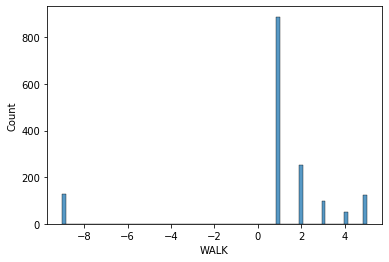

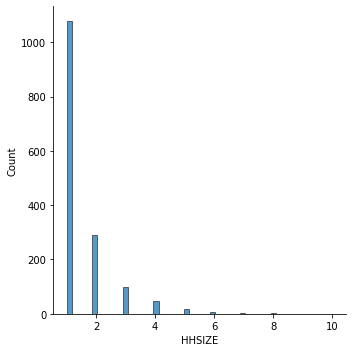

In [19]:
# visualisation of the questions - e.g. for gasoline, might just have an effect on car trips 1 - Agree, 5 disagree
import seaborn as sns
#sns.histplot(non_car['PRICE'])
#sns.histplot(non_car['BIKE2SAVE'])
sns.histplot(non_car['WALK'])
#sns.histplot(non_car['TAXI'])
sns.displot(non_car['HHSIZE'])

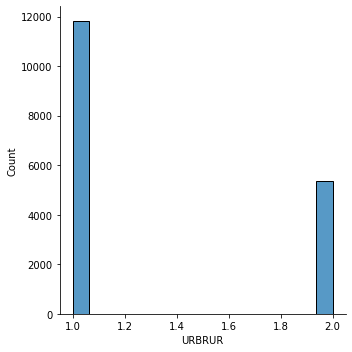

In [20]:
# visualisation of the questions - e.g. for gasoline, might just have an effect on car trips 1 - Agree, 5 disagree
#sns.histplot(cleaned_NY['BIKE2SAVE'])
#sns.histplot(car['PRICE'])
#sns.histplot(car['BIKE2SAVE'])
#sns.histplot(car['PTRANS'])
#sns.histplot(cleaned_NY['TAXI'])
sns.displot(NY_households['URBRUR'])

# no response to these questions 
# aggregate personal to household 
# drop vehicle 

In [21]:
NY_HH_IDS = cleaned_NY['HOUSEID'].values.tolist()

In [22]:
personal = pd.read_csv('perpub.csv')
# filter to NY Households 
NY_personal = personal[personal['HOUSEID'].isin(NY_HH_IDS)]
NY_personal

,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,LSTTRDAY17,OCCAT,SCHTYP,NWALKTRP,WALK4EX,NBIKETRP,BIKE4EX,BIKESHARE,PTUSED,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,DELIVER,MEDCOND,MEDCOND6,HEALTH,PHYACT,VPACT,LPACT,BORNINUS,YRTOUS,YEARMILE,PROXY,WHOPROXY,USEPUBTR,SAMEPLC,W_NONE,W_CANE,W_WLKR,W_WHCANE,W_DOG,W_CRUTCH,W_SCOOTR,W_CHAIR,W_MTRCHR,WORKER,DIARY,OUTCNTRY,FRSTHM17,CNTTDTR,GCDWORK,WKSTFIPS,DRIVER,OUTOFTWN,DISTTOWK17,DISTTOSC17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,WALK_DEF,WALK_GKQ,BIKE_DFR,BIKE_GKP,CONDTRAV,CONDRIDE,CONDNIGH,CONDRIVE,CONDPUB,CONDSPEC,CONDTAX,TRAVDAY,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,DRVRCNT,HHSTATE,HHSTFIPS,NUMADLT,WRKCOUNT,TDAYDATE,HHRESP,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
5,30000012,1,45,5,2,1,2,1,1,-1,2,2,1,3,-1,4,-1,6,6,0,-1,-1,0,-1,0,0,1,30,12,-1,07:30 AM,2,2,-1,-1,-1,5,2,-1,2,3,7,-1,1,-1,17000,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,9,4.60,36,1,2,6.82,-9.00,45,2,3,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5,1,1,2,10,1,NY,36,1,1,201607,1,1,3,3,2,1,3,1,2,1,23,1,2,XXXXX,2,58.966275,C,80,17000,17000,5000,60,17000,7000
16,30000082,1,39,5,2,1,2,1,1,-1,2,2,1,3,-1,2,-1,3,2,0,-1,-1,0,-1,0,0,1,4,3,-1,08:30 AM,1,1,2,-1,-1,3,2,-1,2,2,-1,2,1,-1,8000,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,5,1.04,36,1,2,1.65,-9.00,39,2,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,4,2,8,2,NY,36,2,2,201605,1,4,3,3,2,1,3,1,2,1,23,1,2,XXXXX,2,1028.814768,T,20,1500,300,750,30,750,300
17,30000082,2,38,4,2,2,1,1,1,-1,2,2,1,3,-1,4,-1,0,-1,0,-1,-1,0,-1,0,0,1,42,36,-1,08:45 AM,1,2,2,-1,-1,5,2,-1,2,2,-1,2,1,-1,15000,1,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,7,24.35,36,1,2,30.04,-9.00,38,1,3,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,4,2,8,2,NY,36,2,2,201605,1,4,3,3,2,1,3,1,2,1,23,1,2,XXXXX,2,1296.339345,T,20,1500,300,750,30,750,300
27,30000130,1,45,5,2,1,2,1,1,-1,2,2,1,11,-1,2,-1,5,5,0,-1,-1,20,-1,0,0,-9,60,-1,10,09:00 AM,2,2,-1,-1,-1,0,2,-1,3,2,-1,5,2,1995,-88,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,4,9.65,36,1,2,14.60,-9.00,45,2,3,4,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,5,2,NY,36,2,2,201605,1,2,1,5,1,1,5,1,2,1,21,1,2,35620,1,3705.493904,U,60,30000,17000,5000,70,30000,17000
28,30000130,2,45,4,2,2,1,1,1,-1,2,2,1,11,2,2,-1,6,6,0,-1,-1,5,-1,0,0,-9,60,-1,15,09:00 AM,2,2,-1,-1,-1,0,2,-1,2,3,6,-1,2,1995,6000,2,1,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,2,1,0,11.95,36,1,2,20.22,-9.00,45,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,5,2,NY,36,2,2,201605,1,2,1,5,1,1,5,1,2,1,21,1,2,35620,1,4361.900229,U,60,30000,17000,5000,70,30000,17000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,2,3,1,1,5,2,-1,-1,-1,-1,-1,-1,1,7,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,3,3,0,2,-1,1,2,-1,2,1,-1,-1,1,3,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,5,-9.00,-9,2,2,-9.00,2.17,17,1,4,4,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,7,1,3,3,7,2,NY,36,2,2,201612,2,8,3,1,2,1,1,1,2,1,23,1,2,XXXXX,2,106.020502,C,50,7000,3000,3000,50,3000,3000
264167,40793974,1,81,2,2,1,1,1,6,2,-1,-1,-1,-1,-1,-1,-1,0,-1,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,-1,2,2,-1,3,1,-1,9000,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,7,-9.00,-9,1,2,-9.00,-9.00,81,1,2,1,4,-1,-1,-1,-1,2,2,1,2,2,2,2,3,2,1,1,3,1,NY,36,1,0,201701,1,9,3,1,2,1,1,1,2,1,23,1,2,XXXXX,2,14.522639,R,20,300,300,150,20,300,50
264175,40794020,1,75,3,2,1,1,1,6,2,-1,-1,-1,-1,-1,-1,-1,7,0,0,-1,-1,0,

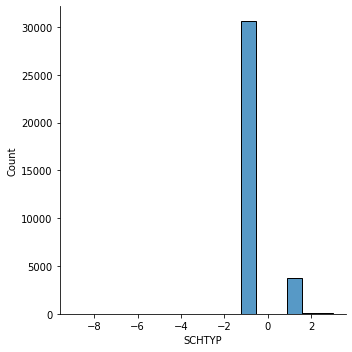

In [34]:
# for checking 
#sns.displot(NY_personal['SCHTYP'])

In [25]:
cleaned_person = NY_personal[['HOUSEID','PERSONID','CARRODE','CARSHARE','CNTTDTR','DISTTOSC17','DISTTOWK17','EDUC','FLEXTIME','GT1JBLWK','HEALTH','MCUSED','NBIKETRP','NOCONG','TIMETOWK','NWALKTRP','OCCAT','PTUSED','PUBTIME','RIDESHARE','R_AGE_IMP','R_SEX_IMP','WKFMHMXX','WKFTPT','WKRMHM']].copy()
cleaned_person

,HOUSEID,PERSONID,CARRODE,CARSHARE,CNTTDTR,DISTTOSC17,DISTTOWK17,EDUC,FLEXTIME,GT1JBLWK,HEALTH,MCUSED,NBIKETRP,NOCONG,TIMETOWK,NWALKTRP,OCCAT,PTUSED,PUBTIME,RIDESHARE,R_AGE_IMP,R_SEX_IMP,WKFMHMXX,WKFTPT,WKRMHM
5,30000012,1,1,0,9,-9.00,6.82,5,2,2,2,-1,0,12,30,6,4,0,-1,0,45,2,-1,1,2
16,30000082,1,1,0,5,-9.00,1.65,5,1,2,2,-1,0,3,4,3,2,0,-1,0,39,2,2,1,1
17,30000082,2,1,0,7,-9.00,30.04,4,2,2,2,-1,0,36,42,0,4,0,-1,0,38,1,2,1,1
27,30000130,1,-9,0,4,-9.00,14.60,5,2,2,3,-1,0,-1,60,5,2,20,10,0,45,2,-1,1,2
28,30000130,2,-9,0,0,-9.00,20.22,4,2,2,2,-1,0,-1,60,6,2,5,15,0,45,1,-1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,-1,0,5,2.17,-9.00,1,-1,-1,1,-1,0,-1,-1,7,-1,0,-1,0,17,1,-1,-1,-1
264167,40793974,1,-1,0,7,-9.00,-9.00,2,-1,-1,2,-1,0,-1,-1,0,-1,0,-1,0,81,1,-1,-1,-1
264175,40794020,1,-1,0,6,-9.00,-9.00,3,-1,-1,2,-1,0,-1,-1,7,-1,0,-1,0,75,1,-1,-1,-1
264176,40794020,2,-1,0,5,-9.00,-9.00,2,-1,-1,3,-1,0,-1,-1,7,-1,0,-1,0,70,2,-1,-1,-1


In [26]:
# aggregate personal to household level 
# oversampling/undersampling

In [28]:
cleaned_person['CARRODE'].value_counts() # most of the condition are skipped
# FLEXTIME - many skipped as well 
# combine med condition and how long 
# remove students?

#cleaned_person[cleaned_person['R_AGE']==cleaned_person['R_AGE_IMP']]

-1     19400
 1     11133
-9      2742
 2       991
 3       175
 4        40
 5        17
 7         5
-7         5
-8         5
 20        4
 10        4
 8         3
 6         3
 15        1
Name: CARRODE, dtype: int64

In [90]:
cleaned_person['WRKTIME'].value_counts() # need to treat

-1          17584
08:00 AM     2065
09:00 AM     1784
08:30 AM     1201
07:00 AM     1119
            ...  
06:22 AM        1
07:49 AM        1
07:03 AM        1
05:40 PM        1
08:47 AM        1
Name: WRKTIME, Length: 360, dtype: int64